# Mathantics Notes — Interactive Notebook

**Goal:** Turn your handwritten notes into runnable demos showing:
- training data (data points) vs hypothesis vs final regression line,
- the vector form `h(x) = θᵀ x`,
- a simple decision boundary example for classification.

This notebook **does not** use gradient descent. Instead it computes the best-fit line using the **normal equation** (closed-form least squares) so it's easy to understand and run.


## Quick conceptual recap
1. **Data points (dots)** — these are the training examples (features on x-axis, label on y-axis). They have noise and don't lie exactly on a line.
2. **Hypothesis function (dashed line)** — an initial guess for the mapping (for example with random θ values).
3. **Regression line (solid line)** — the final fitted model after training (here computed with the normal equation). It won't pass through every point but captures the trend.
4. **Vector form** — the model can be written as `h(x) = θᵀ x` where `θ = [b, w]` (bias and weight) and `x = [1, feature]`.
5. **Decision boundary** — for classification, a linear function can separate classes; the boundary is where `θᵀ x = 0`.


In [1]:
# Imports and helper plotting function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (8,5)
np.random.seed(0)

def plot_data_and_lines(X_raw, y_raw, theta_init=None, theta_final=None, title=''):
    plt.scatter(X_raw, y_raw, alpha=0.6, label='training data')
    xs = np.array([X_raw.min() - 1, X_raw.max() + 1])
    if theta_init is not None:
        y_init = theta_init[0] + theta_init[1] * xs
        plt.plot(xs, y_init, linestyle='--', label='initial hypothesis (dashed)')
    if theta_final is not None:
        y_fit = theta_final[0] + theta_final[1] * xs
        plt.plot(xs, y_fit, color='red', linewidth=2, label='fitted regression (solid)')
    plt.xlabel('feature (x)')
    plt.ylabel('label (y)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


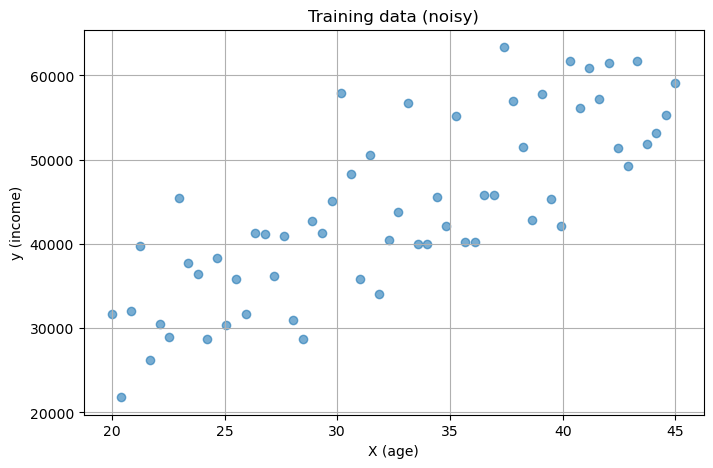

In [4]:
# Create a synthetic dataset (age -> income style)
X = np.linspace(20, 45, 60)  # feature (e.g., age)
y = 1200 * X + 5000 + np.random.normal(0, 7000, X.shape)  # noisy "income" label

# Quick scatter
plt.scatter(X, y, alpha=0.6)
plt.title('Training data (noisy)')
plt.xlabel('X (age)')
plt.ylabel('y (income)')
plt.grid(True)
plt.show()

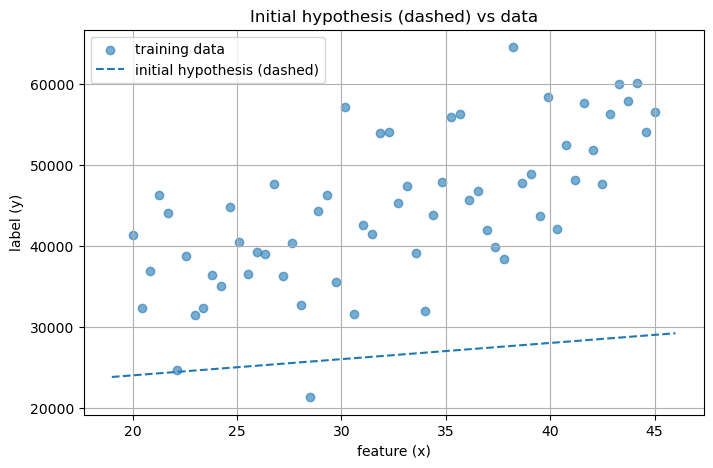

In [10]:
# Example initial hypothesis (random guess for dashed line)
theta_init = np.array([20000., 200.])  # [bias, weight]
plot_data_and_lines(X, y, theta_init=theta_init, title='Initial hypothesis (dashed) vs data')

Learned theta (bias, weight) = [17257.84679275   839.34843927]


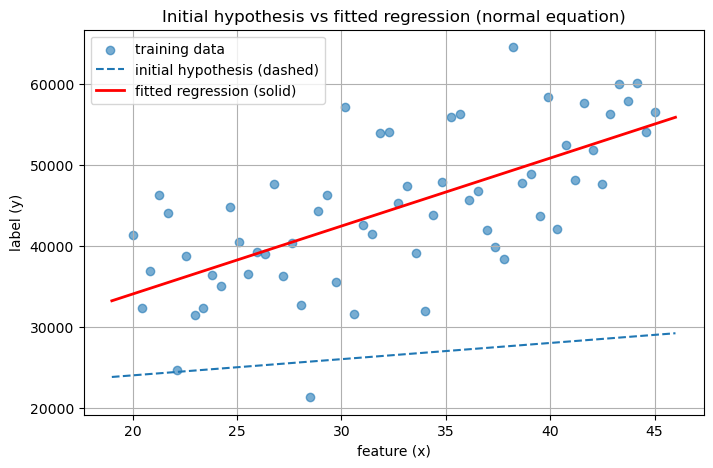

In [11]:
# Compute best-fit line using the normal equation (closed-form least squares)
# X matrix with bias column
X_mat = np.vstack([np.ones_like(X), X]).T  # shape (n,2)
y_vec = y.reshape(-1,1)

# normal equation: theta = (X^T X)^{-1} X^T y
theta_best = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y_vec)
theta_best = theta_best.flatten()
print(f'Learned theta (bias, weight) = {theta_best}')

# Plot fitted line
plot_data_and_lines(X, y, theta_init=theta_init, theta_final=theta_best, title='Initial hypothesis vs fitted regression (normal equation)')

In [12]:
# Demonstrate vector form h(x) = θᵀ x
theta = theta_best.reshape(-1,1)  # (2,1)
x_example = np.array([1, 30]).reshape(-1,1)  # bias=1, feature=30
y_pred = float(theta.T.dot(x_example))
print('theta (bias, weight) =', theta.flatten())
print('example feature vector x =', x_example.flatten())
print('predicted y = θᵀ x =', y_pred)

theta (bias, weight) = [17257.84679275   839.34843927]
example feature vector x = [ 1 30]
predicted y = θᵀ x = 42438.2999707179


/var/folders/m1/2fm2lr990blfk7tz7jgfyzb80000gn/T/ipykernel_26590/2167452423.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = float(theta.T.dot(x_example))


learned perceptron weights (bias, w1, w2) = [0.2   0.523 0.113]


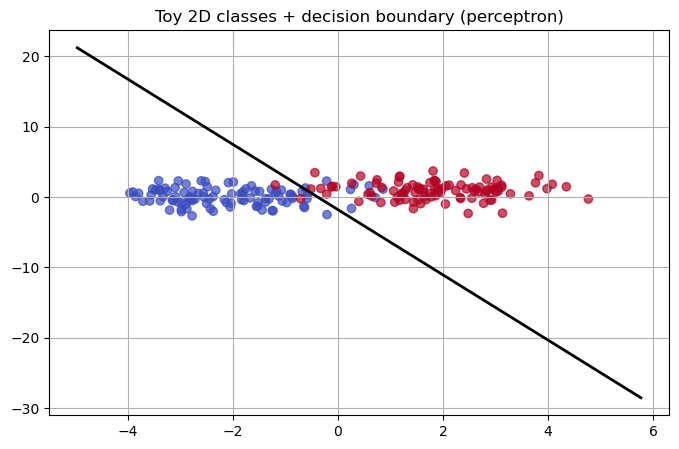

In [13]:
# Simple 2-class toy and a perceptron-style training (manual) to show a decision boundary
# generate two clusters (class 0 and class 1)
n = 200
Xc1 = np.random.randn(n//2, 2) * 1.2 + np.array([-2, 0])
Xc2 = np.random.randn(n//2, 2) * 1.2 + np.array([2, 1])
Xc = np.vstack([Xc1, Xc2])
yc = np.hstack([np.zeros(n//2), np.ones(n//2)])

# Add bias column for perceptron
Xc_bias = np.hstack([np.ones((Xc.shape[0],1)), Xc])  # shape (n,3)

# Perceptron training
w = np.zeros(3)
lr = 0.1
for epoch in range(50):
    for xi, yi in zip(Xc_bias, yc):
        pred = 1 if w.dot(xi) >= 0 else 0
        w += lr * (yi - pred) * xi

print('learned perceptron weights (bias, w1, w2) =', np.round(w, 3))

# plot points and decision boundary
plt.scatter(Xc[:,0], Xc[:,1], c=yc, cmap='coolwarm', alpha=0.7)
xmin, xmax = Xc[:,0].min()-1, Xc[:,0].max()+1
xs = np.linspace(xmin, xmax, 200)
# decision boundary w0 + w1*x + w2*y = 0 => y = -(w0 + w1*x)/w2
ys = -(w[0] + w[1]*xs) / (w[2] + 1e-9)
plt.plot(xs, ys, color='k', linewidth=2)
plt.title('Toy 2D classes + decision boundary (perceptron)')
plt.grid(True)
plt.show()

## Takeaways / Notes
- The **initial hypothesis** is just a guess (we used a simple numeric example). The **fitted regression** computed with the normal equation finds the best bias & weight minimizing squared error.
- The vector form `h(x) = θᵀ x` is a compact way to compute predictions (bias included as `1` in the feature vector).
- The **decision boundary** is where `θᵀ x = 0` for classification; we showed a simple perceptron example for a 2D toy dataset.
- No gradient descent used — the notebook focuses on intuition and quick closed-form solutions suitable for your current notes.
